### Lab 2: Probability, Distributions, and Statistical Questions
#### Jennifer Vo, partners with William Olsen

#### Part 1

*Introduction here*

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

[0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.18044704431548356, 0.09022352215774178, 0.03608940886309672, 0.012029802954365565, 0.0034370865583901616, 0.0008592716395975402, 0.00019094925324389823]


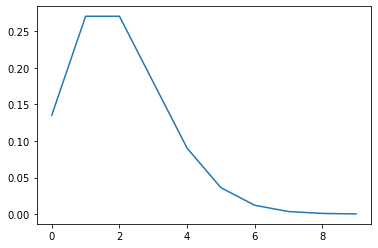

In [26]:
# Poisson lambda parameter = 2 rays/day
avg_bg = 2

# Gamma ray source average = 5 rays/day
avg_gr = 5

fig, ax = plt.subplots(1,1)
x = []
y = []
for i in range (0, 10):
    x.append(i)
    y.append(stats.poisson.pmf(i, avg_bg))

print(y)
plt.plot(x, y)
plt.show()

Observations here.

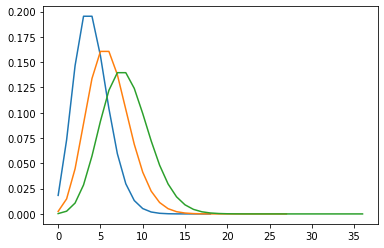

In [32]:
def converge(n):
    conv_poisson = y
    for i in range (0, n):
        conv_poisson = np.convolve(conv_poisson, y)
    
    size = len(conv_poisson)
    x_values = []
    for i in range (0, size):
        x_values.append(i)
        
    plt.plot(x_values, conv_poisson, label = f'n = {n}')

converge(1)
converge(2)
converge(3)
plt.show()

Observations here.

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

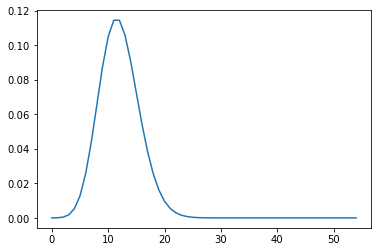

In [37]:
conv_poisson = y
for i in range (0, 5):
    conv_poisson = np.convolve(conv_poisson, y)

size = len(conv_poisson)
x_values = []
for i in range (0, size):
    x_values.append(i)

plt.plot(x_values, conv_poisson, label = f'n = {5}')
plt.show()

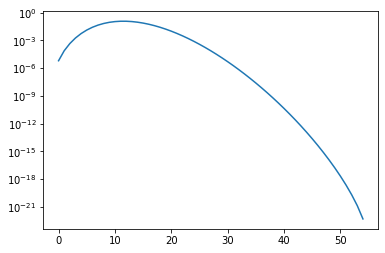

In [39]:
# Plot on a semi-log graph to see the distribution shape
conv_poisson = y
for i in range (0, 5):
    conv_poisson = np.convolve(conv_poisson, y)

size = len(conv_poisson)
x_values = []
for i in range (0, size):
    x_values.append(i)

plt.plot(x_values, conv_poisson, label = f'n = {5}')
plt.yscale('log')
plt.show()

Observations and explanation.

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

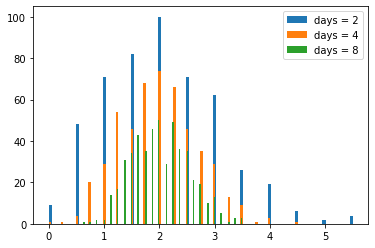

In [72]:
fig, ax = plt.subplots(1,1)

# average day calculation
def avg_dist(days):
    x = []    
    for i in range (0, 500):
        sum = 0
        for j in range (0, days):
            sum += stats.poisson.rvs(avg_bg)
        x.append(sum/days) #appends the average poisson-distributed value
    #print(f'x = {x}')
    
    plt.hist(x, 100, label = f'days = {days}')
    plt.legend()
    
avg_dist(2)
avg_dist(4)
avg_dist(8)

Make observations:
- width decreases (by how much?)
- peak stays the same

Calculate standard deviation here

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.

*Part D*